**Titanic**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('titanic.csv')

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [7]:
data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
138,1030,1,3,"Drapkin, Miss. Jennie",female,23.0,0,0,SOTON/OQ 392083,8.0500,NaN,S
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
285,1177,0,3,"Dennis, Mr. William",male,36.0,0,0,A/5 21175,7.2500,NaN,S
214,1106,1,3,"Andersson, Miss. Ida Augusta Margareta",female,38.0,4,2,347091,7.7750,NaN,S
173,1065,0,3,"Torfa, Mr. Assad",male,NaN,0,0,2673,7.2292,NaN,C


In [8]:
cat=[]
num=[]
for column in data.columns:
    if data[column].nunique()>10:
        num.append(column)
    else:
        cat.append(column)

In [9]:
num

['PassengerId', 'Name', 'Age', 'Ticket', 'Fare', 'Cabin']

In [10]:
cat

['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

**Age vs Survival**

<Axes: xlabel='Age', ylabel='Count'>

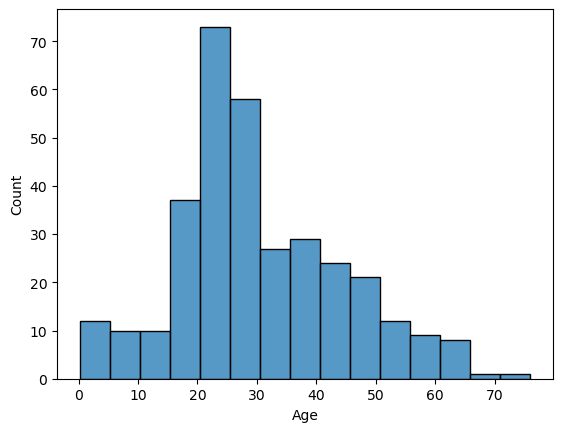

In [26]:
#First age only
sns.histplot(x=data['Age'])

<Axes: xlabel='Age', ylabel='Count'>

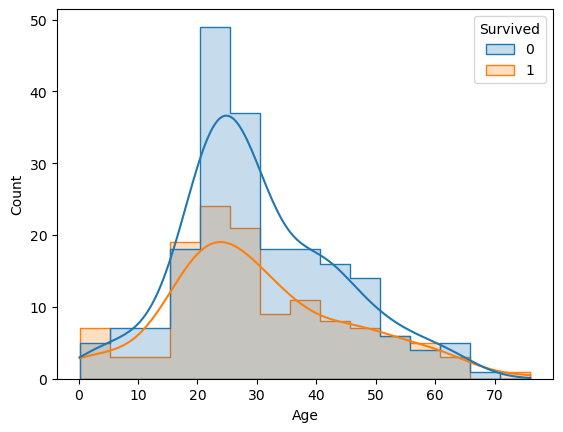

In [ ]:
fig=sns.histplot(x=data['Age'], hue=data['Survived'],kde=True, element="step")
fig
# For my understanding: When you write sns.histplot(data=titanic, x='age'), you are telling Seaborn:

#Take the 'age' column.

#Group the ages into bins (e.g., 0-5, 5-10).

#Count how many rows fall into each bin.

#Draw the bars to that height.
# Then hue creates two seperate bars for category chosen
#kde=True creates the smooth line

In [ ]:
'''We can see the survival data closely follows the data of number of people of different
 age groups, which is as expected. The resulting plot shows that childrem of age
 group 0-5 had more survival than death, showing the "Children First" trend. 
 Similarly people of age group 15-22 had more survivers than the dead. 
 All other age groups have more deaths. The peak mortality can be seen in age group of
 22-30. This suggests that young adults made up the largest portion of those who did not
 survive.
 The distribution is right skewd, mot passengers were between 20 and 40, with very few 
 passengers over the age of 60.'''

**Fare vs Survival**

<Axes: xlabel='Fare', ylabel='Count'>

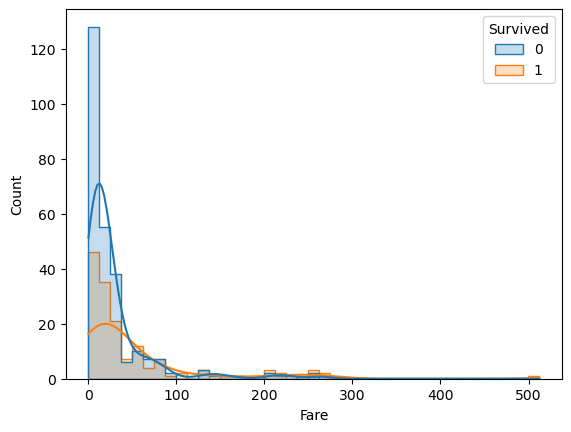

In [ ]:
sns.histplot(x=data['Fare'], hue=data['Survived'],kde=True, element="step")

'''Plot shows Strong Positive Correlation with Survival, unlike Age, where the distributions 
overlapped heavily, the Fare plot shows that passengers who paid very low fares 
(the first blue spike near 0) had a much lower chance of survival.
Notice that at the far right of the X-axis (fares > 200), the orangebars (Survived) are
more frequent or taller relative to the blue bars. This visually confirms that wealth 
(represented by ticket price) was a major factor in survival.
This is a right-skewed distribution. Most people paid between 0 and 50 units, but a few 
individuals paid over 500.'''


**Age vs Fare**

<Axes: xlabel='Age', ylabel='Fare'>

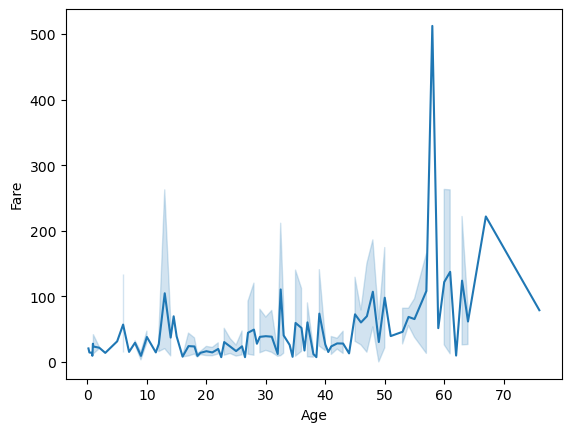

In [42]:
sns.lineplot(x=data['Age'], y=data['Fare'], )

Correlation Heatmap

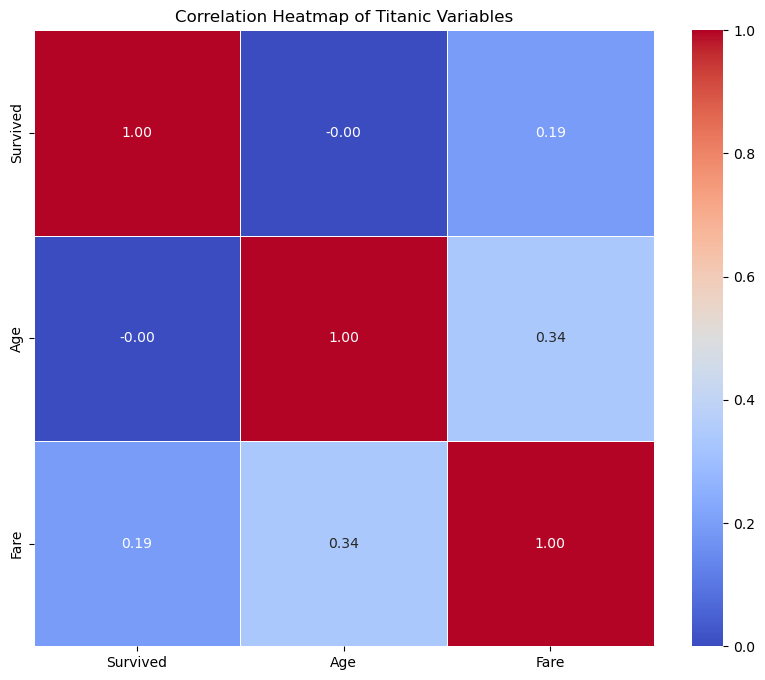

In [5]:
numerical_df = data[['Survived', 'Age', 'Fare']]
corr = numerical_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Titanic Variables')
plt.show()

In [ ]:
'''Survival vs Age: The correaltion map shows no significant 
relation of survival with age. Thus age alone didn't significantly
affect survival of any passanger
Age vs Fare: A moderate positive relation exists between Fare
and Age, indicating that older passengers tended to pay higher
fares on average. This also shows that older people have more
money to spend in general
Fare vs Survival: A weak positive correlation exists between 
Fare and Survival. Passengers who paid higher fares were
slightly more likely to survive, possibly reflecting better
access to lifeboats or higher passenger class.'''